# (2강-실습-2) Bar Plot 사용하기

## 0. 들어가기 앞서

- **실습 개요**: Matplotlib을 사용하여 다양한 막대그래프를 구현한다.
- **실습 진행 목적 및 배경**:
  - 막대그래프를 Hands-on으로 구현하며, 각 요소에 대해 처리하는 논리를 습득한다.
- **실습 수행으로 얻어갈 수 있는 역량**:
  - matplotlib을 통한 막대그래프 구현 역량
- **데이터셋 개요 및 저작권 정보**:
  - [Student Performance Dataset](http://roycekimmons.com/tools/generated_data/exams) ([Kaggle Ver.](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)) | CC0 1.0 Universal Public Domain Dedication
- **실습 핵심 내용**
  - Stacked Bar Plot
  - Percentage Stacked Bar Plot
  - Grouped Bar Plot

## 1. 기본 Bar Plot

- `bar()` : 기본적인 bar plot
- `barh()` : horizontal bar plot

In [72]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

x와 y를 5개 정도로 세팅해서 예시 플롯을 만들어보겠습니다.

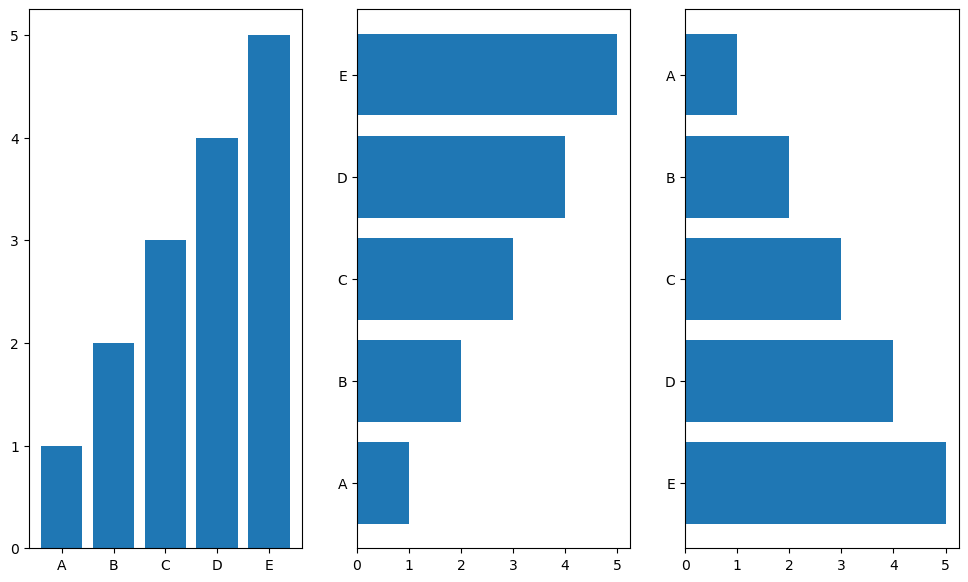

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

axes[0].bar(x, y)
axes[1].barh(x, y)
# reverse 함수도 있고 역순추가도 있고
axes[2].barh(x[::-1], y[::-1])

plt.show()

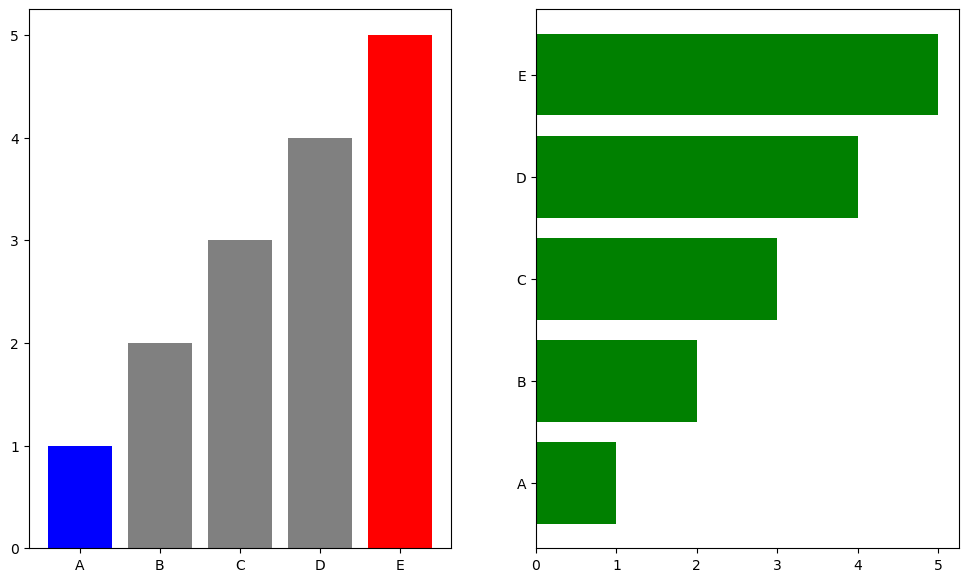

In [74]:
# 강의에서 다루지는 않았지만 막대 그래프의 색은
# 다음과 같이 변경을 전체로 하거나, 개별로 할 수도 있습니다.
# 개별로 할 때는 막대 개수와 같이 색을 리스트로 전해야 합니다.

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x = list('ABCDE')
y = np.array([1, 2, 3, 4, 5])

clist = ['blue', 'gray', 'gray', 'gray', 'red']
# clist = ['blue' if x < 2 else 'gray' for i in x]    # 이런거 된다
color = 'green'
axes[0].bar(x, y, color=clist)
axes[1].barh(x, y, color=color)

plt.show()

## 2. 다양한 Bar Plot

### 2-0. 데이터 준비하기

이제 교육용 데이터셋으로 막대 그래프를 사용해보겠습니다.

데이터는 Student Score Dataset입니다. [link](http://roycekimmons.com/tools/generated_data/exams)

*해당 데이터는 랜덤하게 생성된 데이터입니다. 새롭게 다운로드 받을 경우, 시각화 결과가 다를 수 있습니다.*

- 1000명 학생 데이터
- feature에 대한 정보는 `head()`, `describe()`, `info()` 등으로 확인하고
- `unique()`, `value_counts()` 등으로 종류나 큰 분포 확인
- feautre들
    - **성별** : female / male
    - **인종민족** : group A, group B, group C, group D, group E
    - **부모님 최종 학력** : 고등학교 졸업, 전문대, 학사 학위, 석사 학위, 2년제 졸업
    - **점심** : standard와 free/reduced
    - **시험 예습** : none과 completed
    - **수학, 읽기, 쓰기 성적** (0~100)


In [75]:
#!kaggle datasets download spscientist/students-performance-in-exams

#!unzip students-performance-in-exams.zip

In [76]:
student = pd.read_csv('./StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
732,female,group C,some college,standard,completed,87,89,94
970,female,group D,bachelor's degree,standard,none,89,100,100
766,female,group C,high school,standard,completed,58,75,77
396,female,group B,high school,free/reduced,none,50,67,63
806,female,group D,some college,free/reduced,none,64,74,75


In [77]:
student.iloc[:, 2].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [78]:
# '123'같이 숫자가 문자열로 되어있는 경우 체크
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [79]:
# 범주형 / 연속형 같이 보여주세요
student.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


그룹에 따른 정보를 시각화해봅시다.

> 성별에 따른 race/ethincity 분포

코드로는 다음과 같이 쉽게 구할 수 있습니다.


### GROUPBY 사용해서 막대그래프 비교

In [80]:
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)
print(student['gender'].value_counts())

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: count, dtype: int64

gender
female    518
male      482
Name: count, dtype: int64


### 2-1. Multiple Bar Plot

우선 가장 기본적인 형식의 Multiple Bar을 그려보겠습니다.

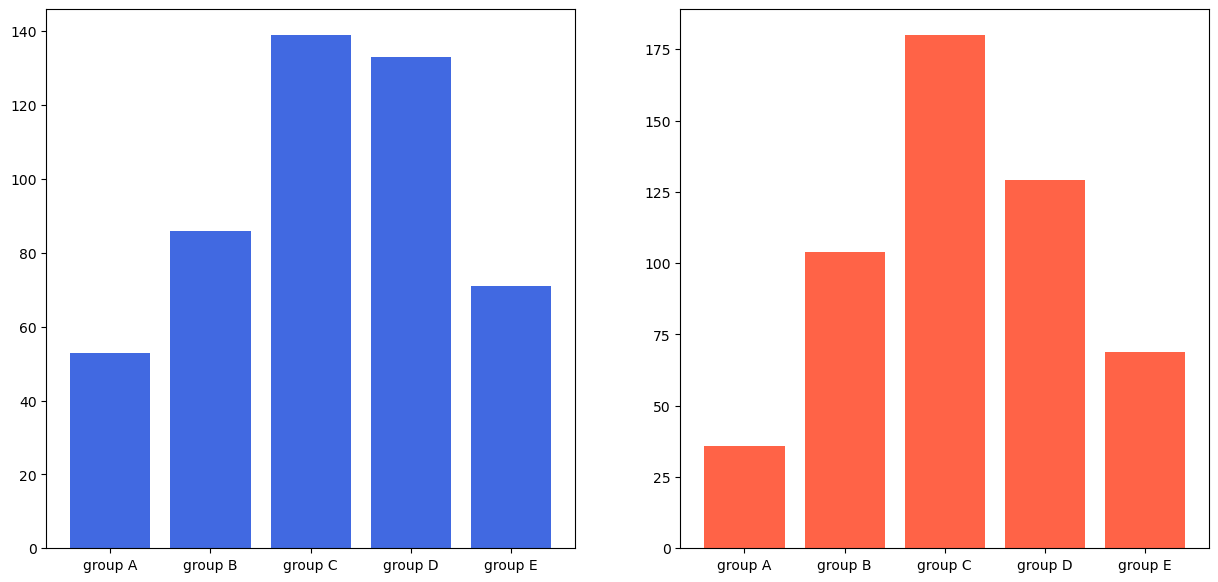

In [81]:
################################################최댓값 맞추세요
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

각 barplot은 자체적으로 y 범위를 맞추게 됩니다. (좌/우 y축 비교)

다만 이 경우, 분포에 대해 비교는 쉽지만 실제 값에 대해 비교는 어렵습니다.

subplot을 만들 때, `sharey` 파라미터를 사용하면 조금 더 값에 대한 비교가 가능합니다.

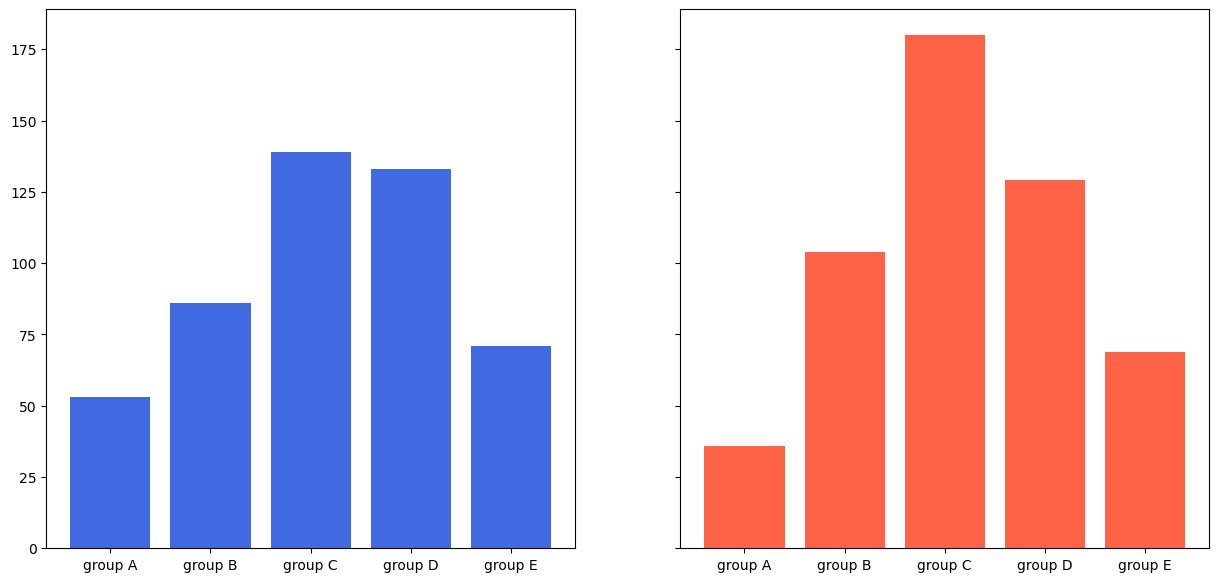

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)        ##############sharey로 y 공유
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')
plt.show()

또 다른 방법으로는 y축 범위를 개별적으로 조정하는 방법입니다. 이렇게 할 때는 반복문을 사용하여 조정하는 방법을 선호합니다.

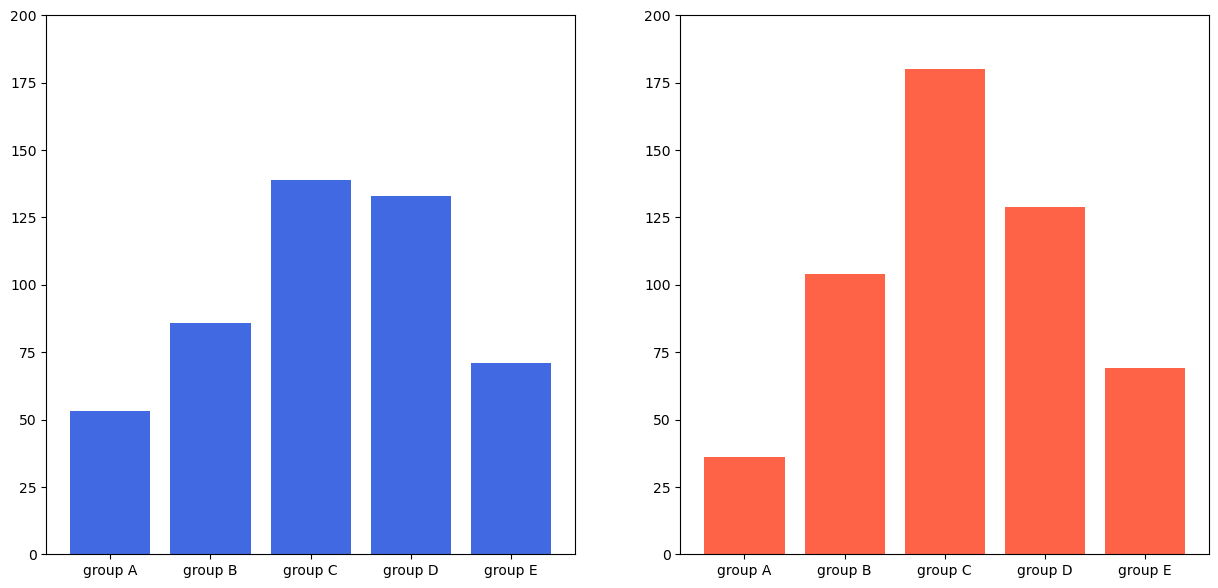

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

다만 이 방법은 여전히 Group간의 비교가 어렵다는 단점이 있습니다.

### 2-2. Stacked Bar Plot

쌓아서 보면 그룹 A, B, C, D, E에 대한 전체 비율은 알기 쉽습니다.


`bottom` 파라미터를 사용해서 아래 공간을 비워둘 수 있습니다.

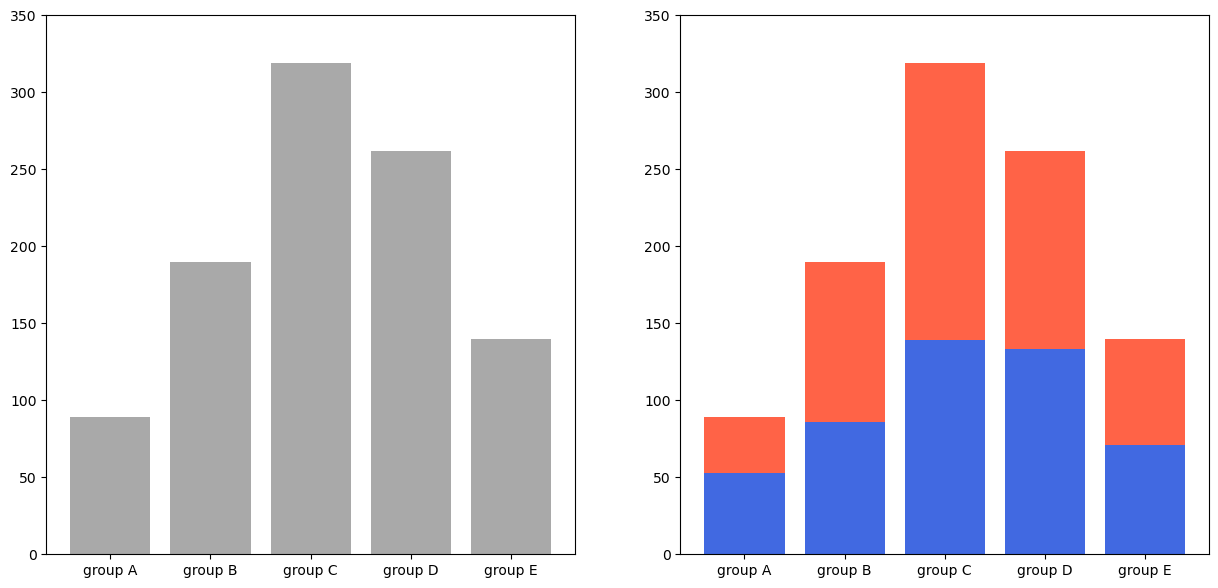

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='darkgray')
axes[1].bar(group['male'].index, group['male'], color='royalblue')                # 합친거 써놓고
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='tomato') ##### bottom : 파랑 얼만큼 차지 -> 파랑 얼마 빨강 얼마 뜨죠

for ax in axes:
    ax.set_ylim(0, 350)

plt.show()


### 2-3. Percentage Stacked Bar Plot

좀 더 advanced한 테크닉을 사용한다면 다음과 같습니다.

In [130]:
group

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: count, dtype: int64

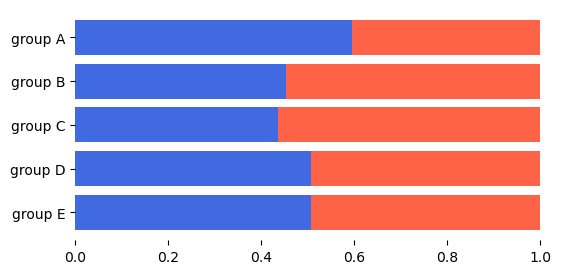

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

group = group.sort_index(ascending=False) # 역순 정렬
total=group['male']+group['female'] # 각 그룹별 합


ax.barh(group['male'].index, group['male']/total,
        color='royalblue')

ax.barh(group['female'].index, group['female']/total,
        left=group['male']/total,
        color='tomato')

ax.set_xlim(0, 1)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### 2-4. Overlapped Bar Plot : 비추

겹치는 투명도는 꼭 정해진 것이 아닌 다양한 실험을 통해 선택하면 됩니다.

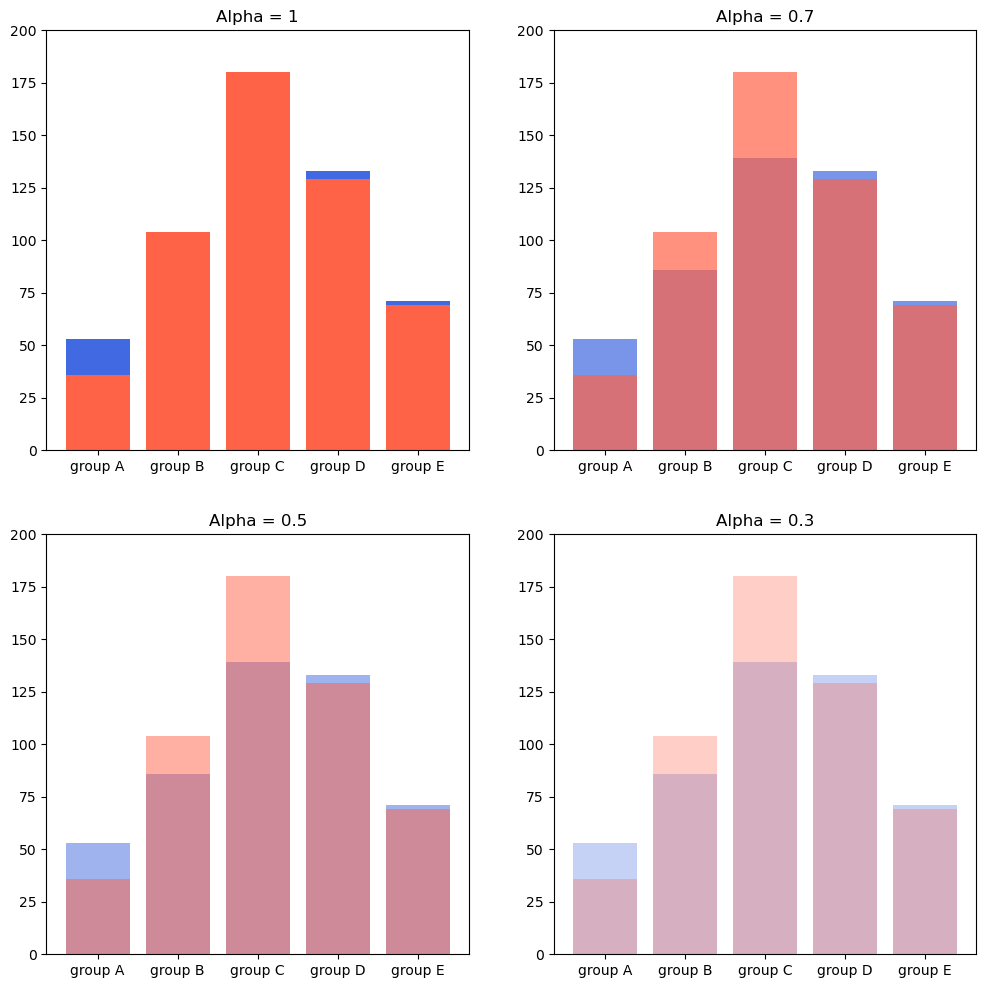

In [89]:
group = group.sort_index() # 다시 정렬

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.7, 0.5, 0.3]):
    axes[idx].bar(group['male'].index, group['male'],
                  color='royalblue',
                  alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'],
                  color='tomato',
                  alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')

for ax in axes:
    ax.set_ylim(0, 200)


plt.show()

### 2-5. Grouped Bar Plot

크게 3가지 테크닉으로 구현 가능합니다.

- x축 조정
- `width`  조정
- `xticks`, `xticklabels`

원래 x축이 0, 1, 2, 3로 시작한다면
- 한 그래프는 0-width/2, 1-width/2, 2-width/2 로 구성하면 되고
- 한 그래프는 0+width/2, 1+width/2, 2+width/2 로 구성하면 됩니다.

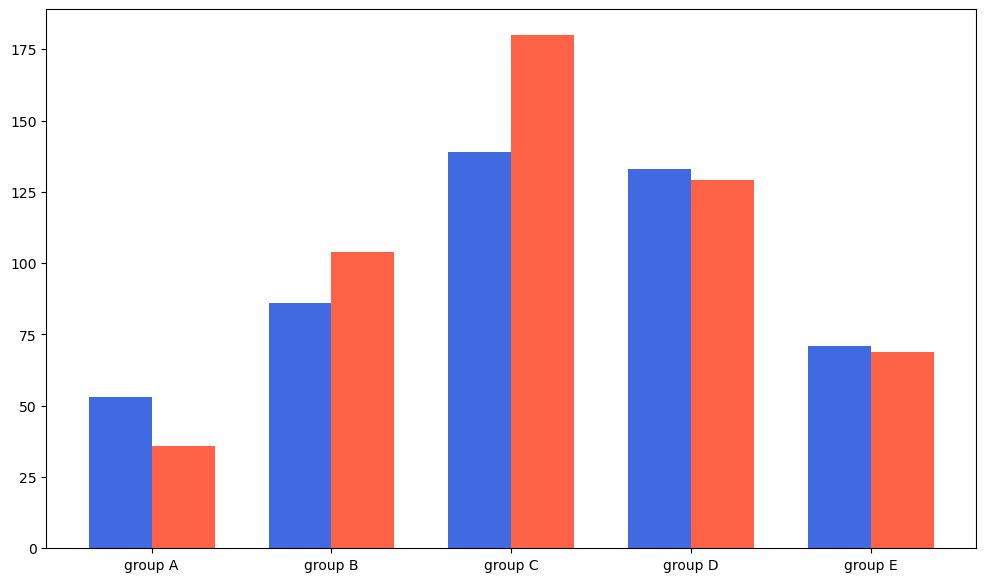

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'],
       color='royalblue',
       width=width)

ax.bar(idx+width/2, group['female'],
       color='tomato',
       width=width)

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)

plt.show()

그리고 추가적으로 label + legend를 달아 색에 대한 설명도 추가하면 좋습니다.

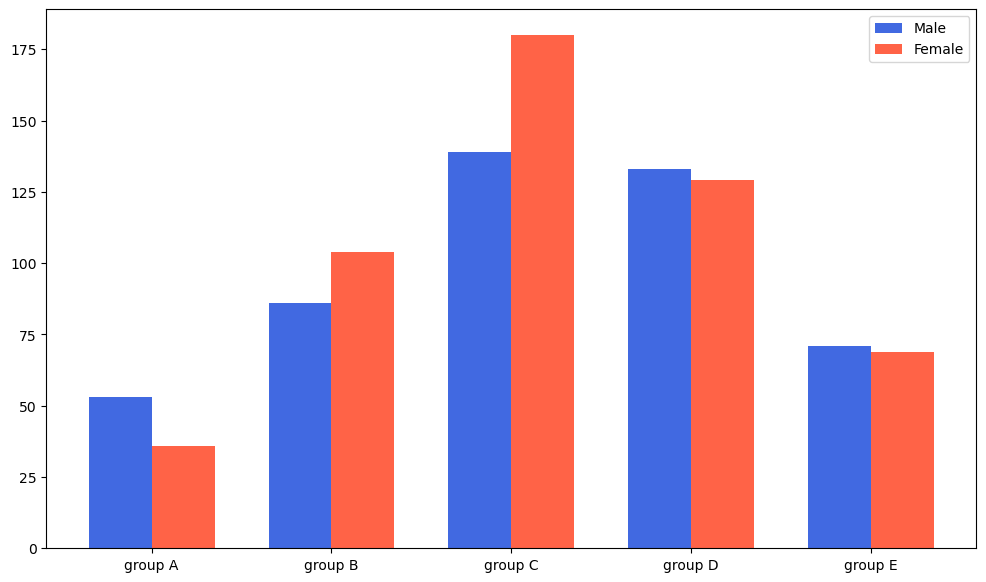

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'],
       color='royalblue',
       width=width, label='Male')

ax.bar(idx+width/2, group['female'],
       color='tomato',
       width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()

plt.show()

그렇다면 그룹이 N개 일때는 어떻게 하면 될까요?

그룹의 개수에 따라 x좌표는 다음과 같습니다.

- 2개 : -1/2, +1/2
- 3개 : -1, 0, +1 (-2/2, 0, +2/2)
- 4개 : -3/2, -1/2, +1/2, +3/2

규칙이 보이시나요?

$-\frac{N-1}{2}$에서 $\frac{N-1}{2}$까지 분자에 2간격으로 커지는 것이 특징입니다.


그렇다면 index i(zero-index)에 대해서는 다음과 같이 x좌표를 계산할 수 있습니다.

$x+\frac{-N+1+2\times i}{2}\times width$

이번엔 인종/민족 그룹에 따른 Parental Level of Education을 Grouped Bar Plot으로 그려보겠습니다.

In [35]:
group = student.groupby('parental level of education')['race/ethnicity'].value_counts().sort_index()
group_list = sorted(student['race/ethnicity'].unique())
edu_lv = student['parental level of education'].unique()

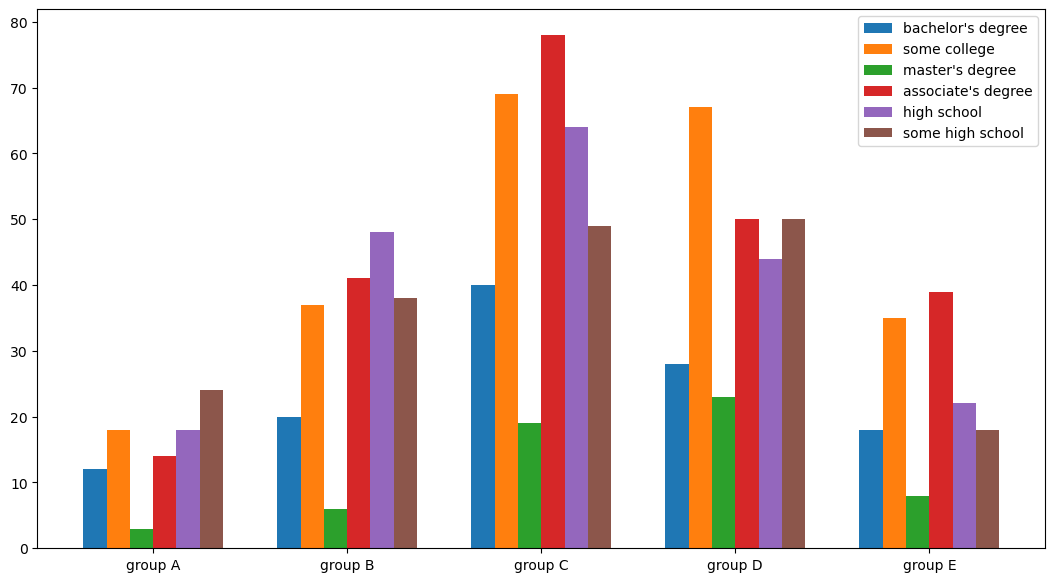

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7))

x = np.arange(len(group_list))
width=0.12

for idx, g in enumerate(edu_lv):
    ax.bar(x+(-len(edu_lv)+1+2*idx)*width/2, group[g],
       width=width, label=g)

ax.set_xticks(x)
ax.set_xticklabels(group_list)
ax.legend()

plt.show()

## 3. 정확한 Bar Plot

### 3-1. Principle of Proportion Ink

성별에 따른 성적을 막대그래프로 비교해보겠습니다.

In [37]:
score = student.groupby('gender').mean(numeric_only=True).T
score

gender,female,male
math score,63.633205,68.728216
reading score,72.608108,65.473029
writing score,72.467181,63.311203


In [38]:
###

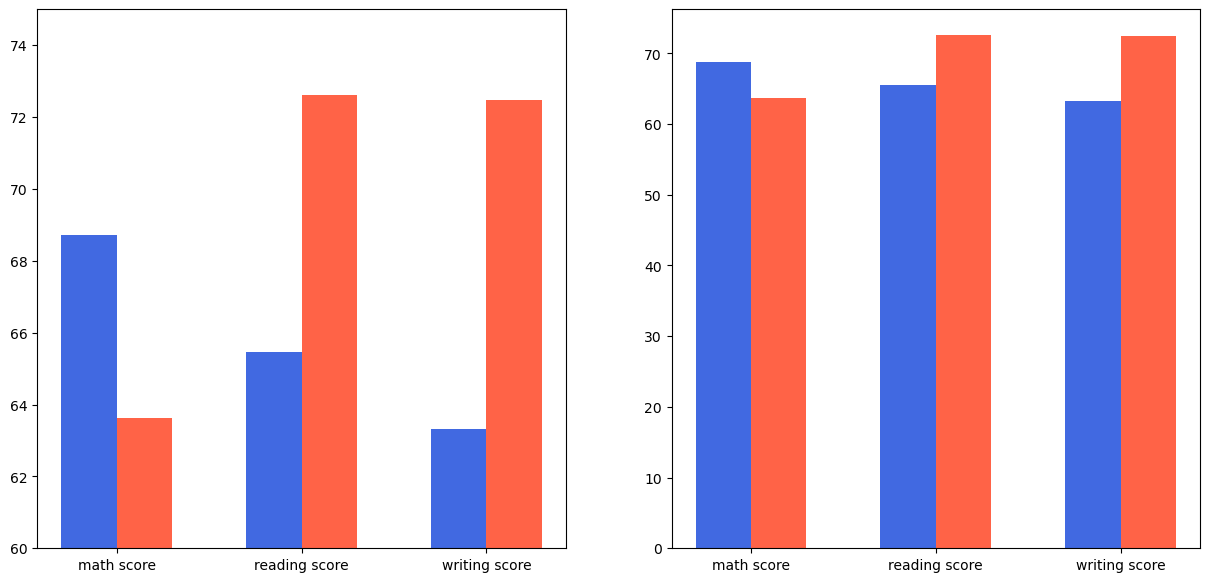

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

idx = np.arange(len(score.index))
width=0.3

for ax in axes:
    ax.bar(idx-width/2, score['male'],
           color='royalblue',
           width=width)

    ax.bar(idx+width/2, score['female'],
           color='tomato',
           width=width)

    ax.set_xticks(idx)
    ax.set_xticklabels(score.index)

axes[0].set_ylim(60, 75)

plt.show()

비교를 위한다면 세로를 늘리는 게 더 좋을 수 있습니다.

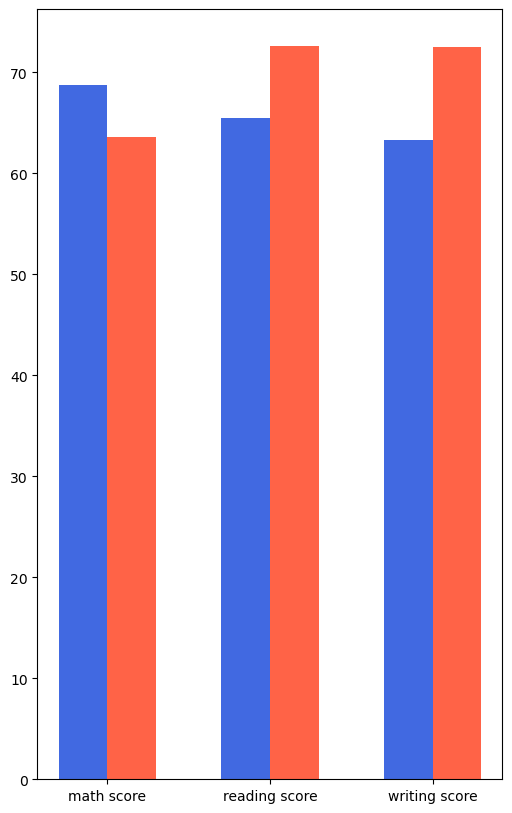

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 10))

idx = np.arange(len(score.index))
width=0.3

ax.bar(idx-width/2, score['male'],
       color='royalblue',
       width=width)

ax.bar(idx+width/2, score['female'],
       color='tomato',
       width=width)

ax.set_xticks(idx)
ax.set_xticklabels(score.index)



plt.show()

### 3-2 데이터 정렬하기

간단하게 데이터를 정렬해보겠습니다.

In [41]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3-3. 적절한 공간 활용

다양한 공간 테크닉을 살펴보겠습니다. 공간을 더 효과적으로 보여주기 위해 다음과 같은 항목을 수정할 수 있습니다.

- X/Y axis Limit (`.set_xlim()`, `.set_ylime()`): 축의 범위
- Margins (`.margins()`): 마진
- Gap (`width`): 막대의 너비
- Spines (`.spines[spine].set_visible()`): ax 차트의 테두리

대조군을 위해 2개의 같은 플롯을 그려보겠습니다.

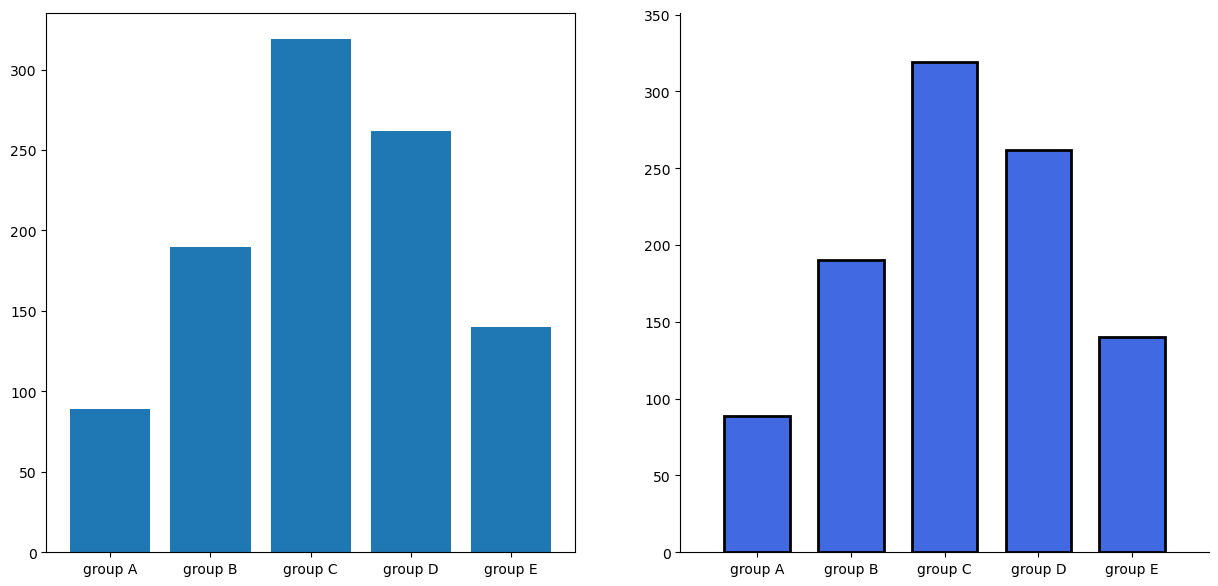

In [42]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig = plt.figure(figsize=(15, 7))

ax_basic = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)

ax_basic.bar(group_cnt.index, group_cnt)
ax.bar(group_cnt.index, group_cnt,
       width=0.7,
       edgecolor='black',
       linewidth=2,
       color='royalblue'
      )

ax.margins(0.1, 0.1)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### 3-4. 복잡함과 단순함

명확한 비교를 위해 그리드를 추가할 수 있습니다.
다만 모든 축에 그리드를 넣는다면 복잡함을 초래할 수 있습니다.

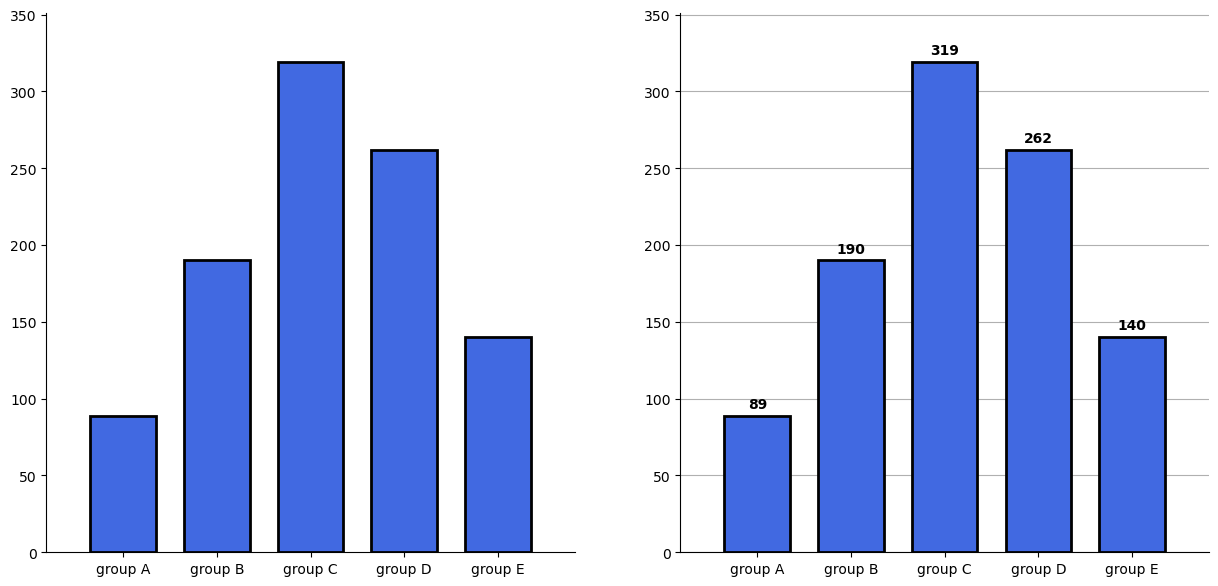

In [43]:
group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

for ax in axes:
    p = ax.bar(group_cnt.index, group_cnt,
           width=0.7,
           edgecolor='black',
           linewidth=2,
           color='royalblue',
           zorder=10             # zorder로 그리드 위에 그래프 그림
          )

    ax.margins(0.1, 0.1)
    ax.spines[['top', 'right']].set_visible(False) # 테두리 제거

# axes[1].grid(axis='both', zorder=0)
axes[1].grid(axis='y', zorder=0)


# 그래프 위에 숫자 쓰는 방법론 2가지
for idx, value in zip(group_cnt.index, group_cnt):
    axes[1].text(idx, value+5, s=value,
                 ha='center',
                 fontweight='bold'
                )

# axes[1].bar_label(p, label_type='edge') # bar_label을 사용할 수 있으나 디테일한 조정이 어려울 수 있음
plt.show()

### 3-5. ETC

오차막대(`errorbar`)를 사용하여 편차 등의 정보를 추가해보겠습니다.

In [44]:
score_var = student.groupby('gender').std(numeric_only=True).T
score_var

gender,female,male
math score,15.491453,14.356277
reading score,14.378245,13.931832
writing score,14.844842,14.113832


In [47]:
score.index

Index(['math score', 'reading score', 'writing score'], dtype='object')

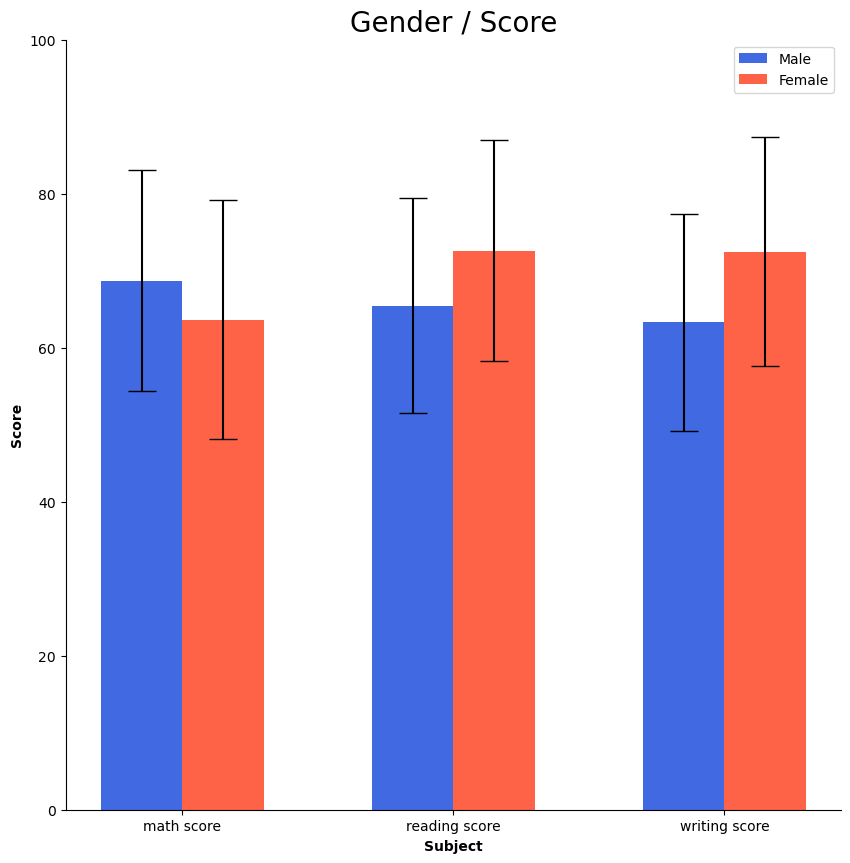

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

idx = np.arange(len(score.index))
width=0.3


ax.bar(idx-width/2, score['male'],
       color='royalblue',
       width=width,
       label='Male',
       yerr=score_var['male'],
       capsize=10
      )

ax.bar(idx+width/2, score['female'],
       color='tomato',
       width=width,
       label='Female',
       yerr=score_var['female'],
       capsize=10
      )

ax.set_xticks(idx)
ax.set_xticklabels(score.index)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()

### **콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.
